In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#column name assignment
cancer=pd.read_csv('E:\AI_ML_DL\Data&Python_code\DATA\habermans-survival-data-set\haberman.csv',header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
cancer.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [37]:
#getting the the information
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


Observation:
1.no null values from each column
2.target value is the 4th column

In [38]:
cancer['survival_status_after_5_years'].unique()
#cancer.head()

array([1, 2], dtype=int64)

Observation:
there are two different types of classes= '1' and '2'

# Converting yes and no into numerical values

In [39]:
cancer['survival_status_after_5_years']=cancer['survival_status_after_5_years'].map({1:'yes',2:'no'})
#cancer['survival_status_after_5_years']

In [40]:
cancer['survival_status_after_5_years'] = cancer['survival_status_after_5_years'].astype('category')

# Finding statistics of data

In [41]:
print("Different value count:"  + str(cancer.iloc[:,-1].value_counts()))
print("Name of columns" + cancer.columns)
cancer.describe()

Different value count:yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
Index(['Name of columnsage', 'Name of columnsyear_of_treatment',
       'Name of columnspositive_lymph_nodes',
       'Name of columnssurvival_status_after_5_years'],
      dtype='object')


,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Observation:
1. ages of the patients vary from 30 to 83 with mean 52
2. number of surviving patients is 225 and not surviving patients is 81
3. From above point it can be said that target set is unbalanced
4. surviving chance is typically depends on age, year of treatment and number of positive lymph

# Histogram and kernel desity estimation

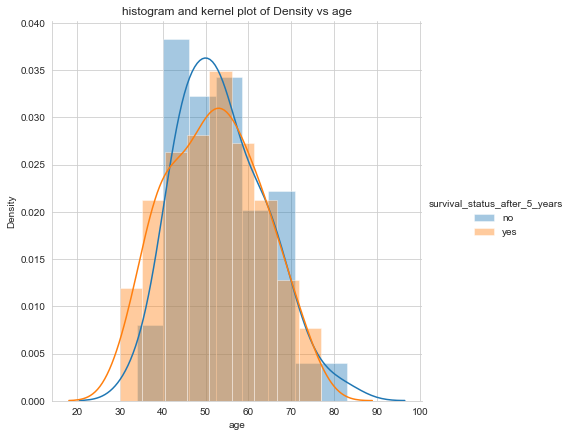

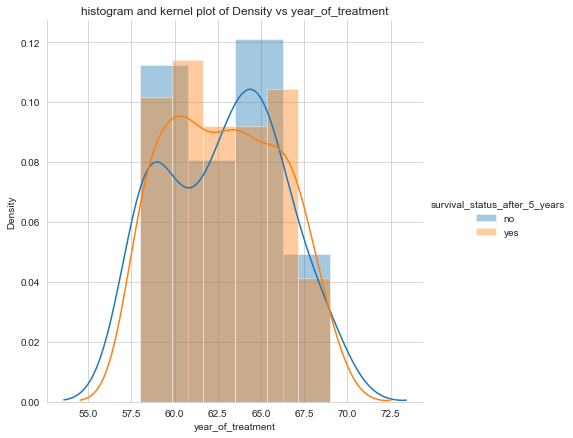

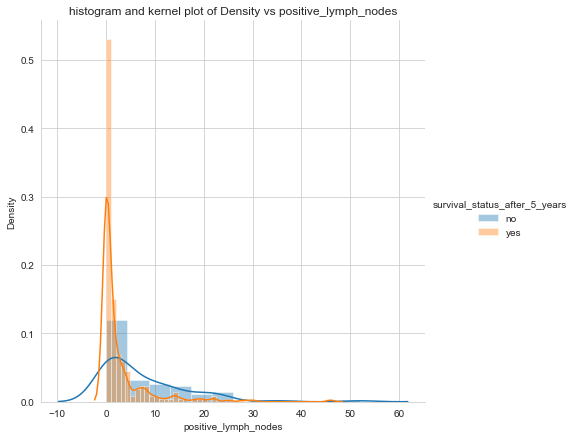

In [49]:

for i,feature in enumerate(list(cancer.columns)[0:3]): #'i used for indexing purpose'
    fg = sns.FacetGrid(cancer, hue='survival_status_after_5_years', size=6)
    fg.map(sns.distplot, feature).add_legend()
    plt.ylabel('Density')
    plt.xlabel(str(cancer.columns[i]))
    plt.title('histogram and kernel plot of Density vs ' +  str(feature))
    plt.show()


Observation:
1. from the first plot Density vs age; if age is between 40 to 65, 50% chances of surviving
2. From the second plot against 'year of treatment', any kind of conclusion cannot be drawn
3. From the third plot, against '# positive lymph', it can be observed that if number of positive lymph is less than 2, there is high chance of surving else surviving chances are less.

# PDF and CDF

******age******


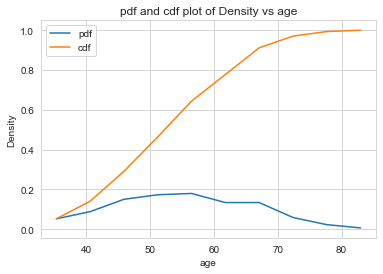

******year_of_treatment******


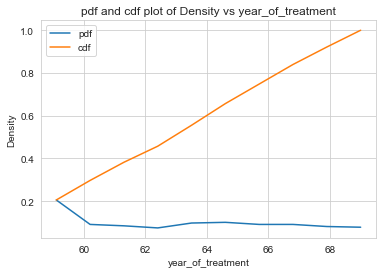

******positive_lymph_nodes******


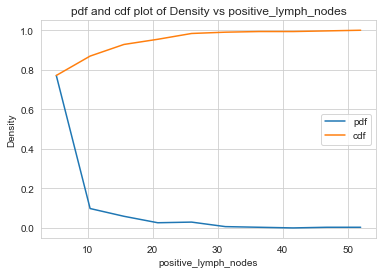

In [50]:
for ind, fet in enumerate(list(cancer.columns)[0:3]):
    counts, bin_edges = np.histogram(cancer[fet], bins=10, 
                                     density = True)
    pdf = counts/(sum(counts))
#     print(pdf);
#     print(bin_edges)
    print('******'+fet+"******")
    #compute CDF
    cdf = np.cumsum(pdf)
    plt.ylabel('Density')
    plt.xlabel(fet)
    plt.plot(bin_edges[1:],pdf, label='pdf')
    plt.plot(bin_edges[1:], cdf, label='cdf')
    plt.title('pdf and cdf plot of Density vs '+ str(fet))
    plt.legend()
    plt.show();

# Box plotting

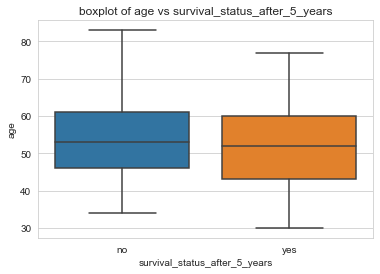

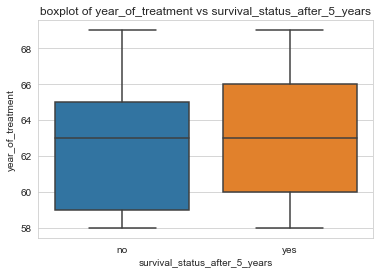

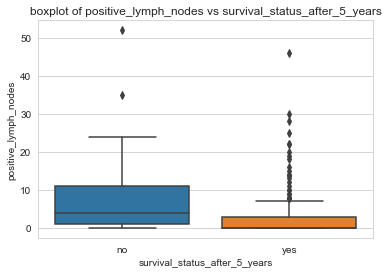

In [60]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer.columns)[0:3]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=cancer)
    plt.title('boxplot of ' + str(feature ) + ' vs survival_status_after_5_years' )
    plt.show()  

Observation:
1. from first plot age vs survival_status_after_5_years, it can be observed that survival of the patient can be decided if age of the patient less than 46.
2. from first plot year_of_treatment vs survival_status_after_5_years, if treatment year is greater than 65 then patient could survived.
3. number positive lymph vs survival_status_after_5_years, if # lymph is greater than 2 or 3 then survival of patient is less.

# Violin plot

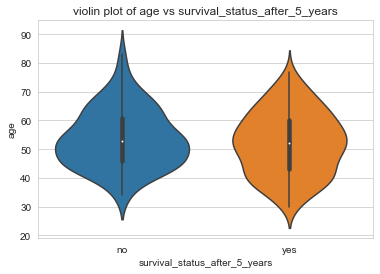

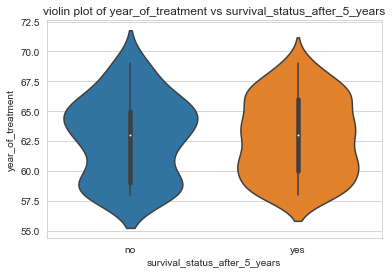

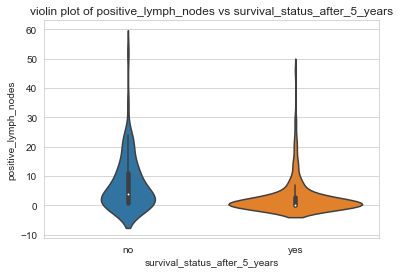

In [57]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    sns.violinplot(x="survival_status_after_5_years", y=feature, data=cancer, size=8)
    plt.title('violin plot of ' + str(feature) + ' vs ' + 'survival_status_after_5_years')
    #sns.violinplot( x='survival_status_after_5_years', y=feature, data=cancer, ax=axes[idx])
    plt.show()

Observation:
1. Violin plot is the mistuxe of pdf and blox plot. The thick black are is the boxplot, where white dot is the center, upper box is 75 percentile and lower bo is 25 percentile.
2. none of the distributions are gaussion or other known distribution. only third one is more like tail distribution.
    

# Pair plotting

C:\Users\BSG\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


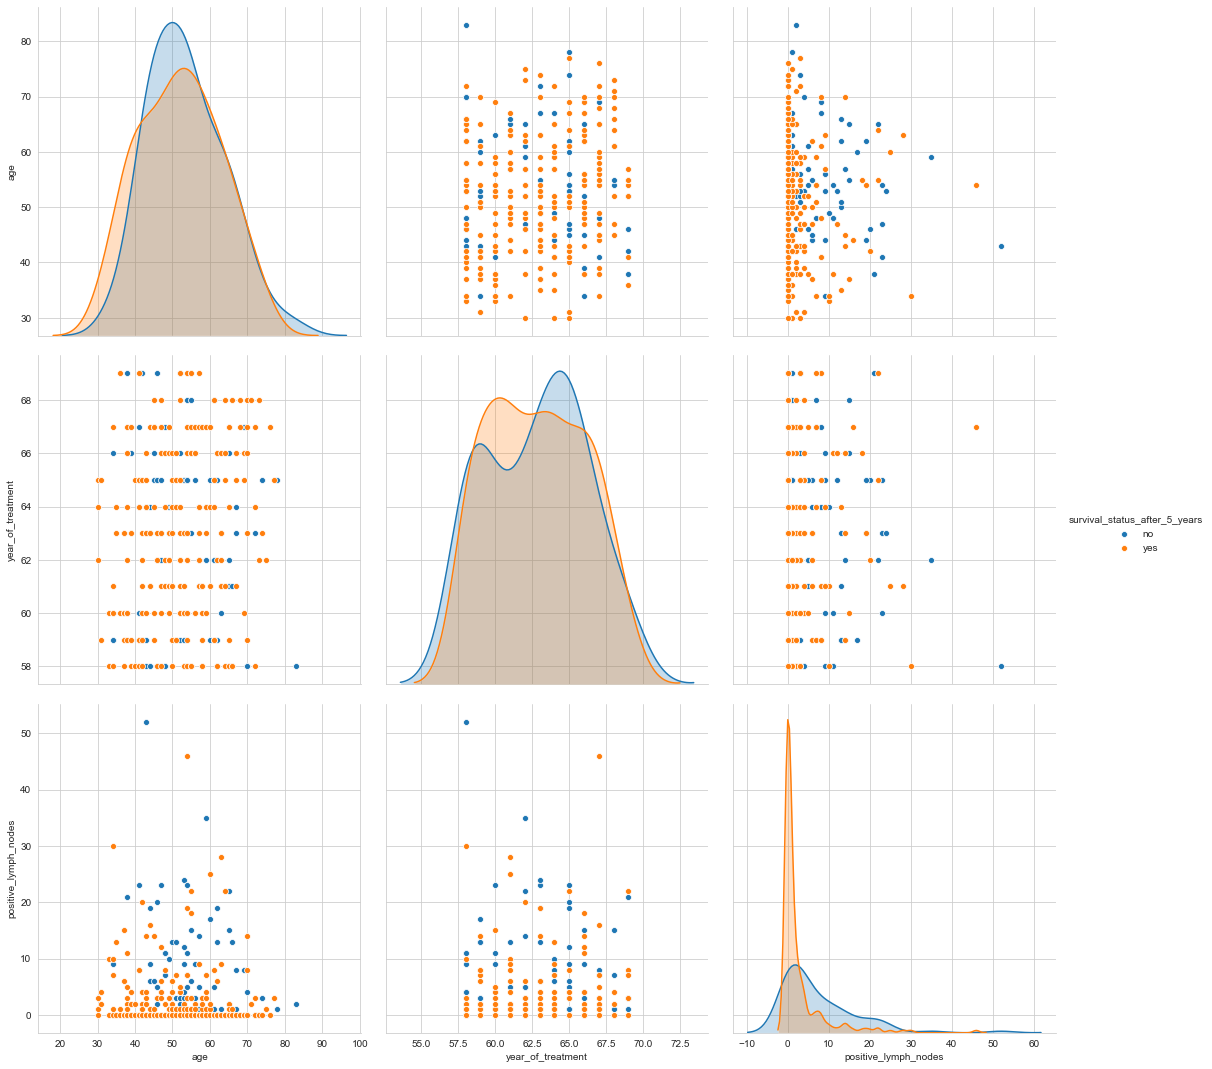

In [12]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(cancer,hue="survival_status_after_5_years",size=5)
plt.title()
plt.show()

Observation:
There are no two features that can predict propery. No linear boundary can tell the survival status. I think we need any non-linear(e.g. RBF) kernel for proper prediction. Simple if,else condition may not work accurately 

# Median, Percentile, Quantile, IQR, MAD

In [13]:
print('\n Median:')
for i, ind in enumerate(list(cancer.columns)[0:3]):
    print(np.median(cancer[ind]))
print('\n Percentile:')
for i, ind in enumerate(list(cancer.columns)[0:3]):
    print(np.percentile(cancer[ind],np.arange(0,100,25)))
print('\n 90 th Quantle:')
for i, ind in enumerate(list(cancer.columns)[0:3]):
    print(np.percentile(cancer[ind],90))
from statsmodels import robust
print('\nMedian absolute deviation:')
for i, ind in enumerate(list(cancer.columns)[0:3]):
    print(robust.mad(cancer[ind]))


 Median:
52.0
63.0
1.0

 Percentile:
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]

 90 th Quantle:
67.0
67.0
13.0

Median absolute deviation:
11.860817748044816
4.447806655516806
1.482602218505602


# Multivariate probability density, contour plot.

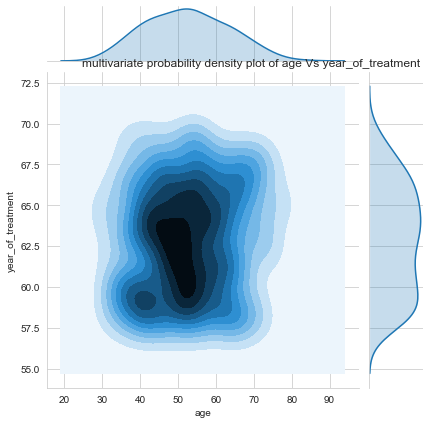

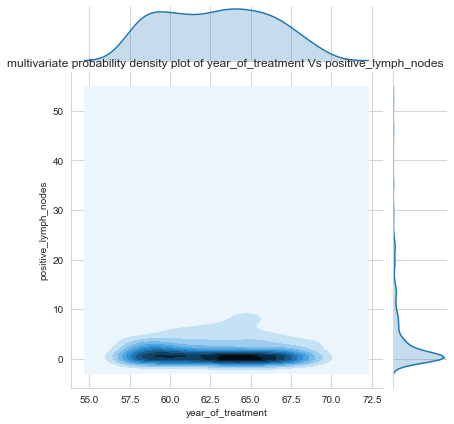

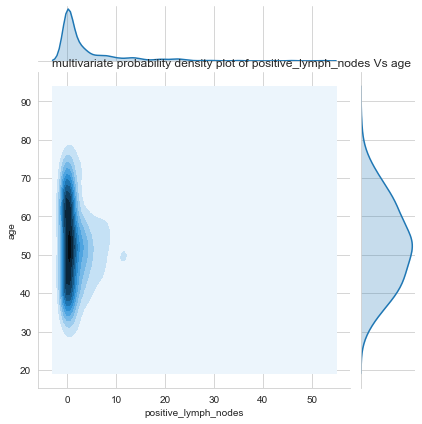

In [63]:
sns.jointplot(x="age", y="year_of_treatment", data=cancer, kind="kde");
plt.title('multivariate probability density plot of age Vs year_of_treatment ',loc='right' )

sns.jointplot('year_of_treatment','positive_lymph_nodes', data=cancer,kind='kde')
plt.title('multivariate probability density plot of year_of_treatment Vs positive_lymph_nodes ',loc='right'  )
sns.jointplot('positive_lymph_nodes','age',data=cancer,kind='kde')
plt.title('multivariate probability density plot of positive_lymph_nodes Vs age ' ,loc='right' )
plt.show();

Observation:
From the countour plot the deep colour region is high density region, i.e. more points gather at that region. And same colour region has equal height and the deeper the colour the higher the plot is in 3D point of view.

# Overall observation

1. From the above analysis it is evient that most of the features excent lymph number cannot individually decide the survival status.
2. only number of lymph is the key factor of survival of patient. Along with lymph number, the treatment year can partially tells the survival staus. If lymph number is less than 3 and treatment year is in between 59 to 62.5, then survival chance is higher.
3. Basically decision plane is non linear, so prediction can be done properly if we use any non linear decision boundary, like SVM with RBF kernel.
